# Big Data Mart Sales Problem

### Description

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


#### Importing DataSets

In [2]:
Train=pd.read_csv("bigdatamart_Train.csv")
Test=pd.read_csv('bigdatamart_Test.csv')

In [3]:
Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
#checking shape
print('Train:',Train.shape)
print('Test:',Test.shape)

Train: (8523, 12)
Test: (5681, 11)


In [6]:
#statistical summery
Train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#check null values
Train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
Test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
#Concat Train and Test datasets
Train['source']='train'
Test['source']='test'
df=pd.concat([Train,Test],ignore_index=True)

In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [11]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

There are 2439 null values in Item_Weight and 4016 null values in Outlet_Size and 5681 null values in Item_Outlet_Values which we have to predict.

In [13]:
df.shape

(14204, 13)

we have 14204 rows and 13 columns after concating both datasets.

### Uni-variate analysis

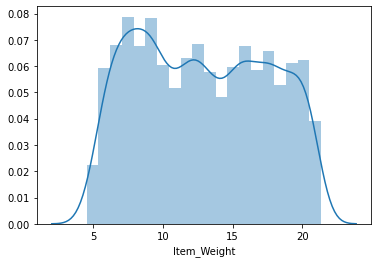

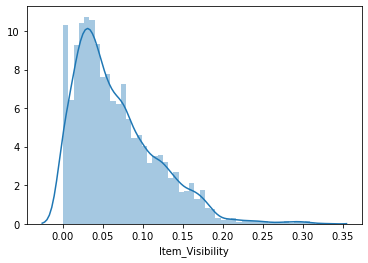

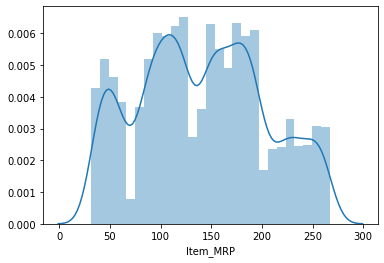

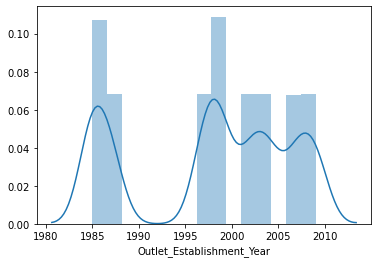

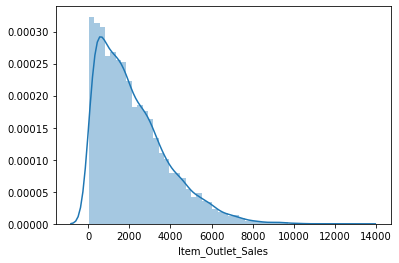

In [14]:
for i in Train.describe().columns:
    sns.distplot(Train[i].dropna())
    plt.show()

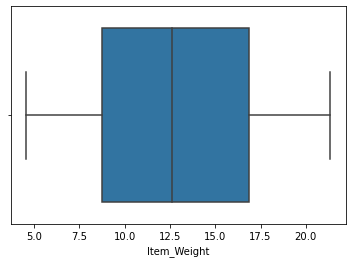

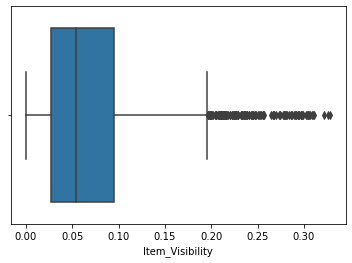

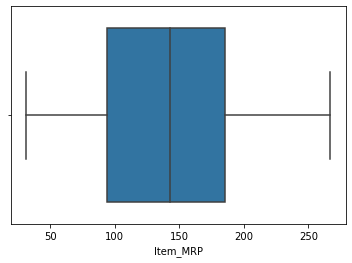

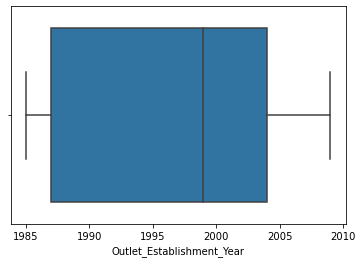

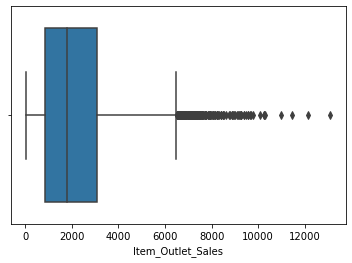

In [15]:
for i in Train.describe().columns:
    sns.boxplot(Train[i].dropna())
    plt.show()

only in Item Visibility and Item_Outlet_sales we can observe outliers.

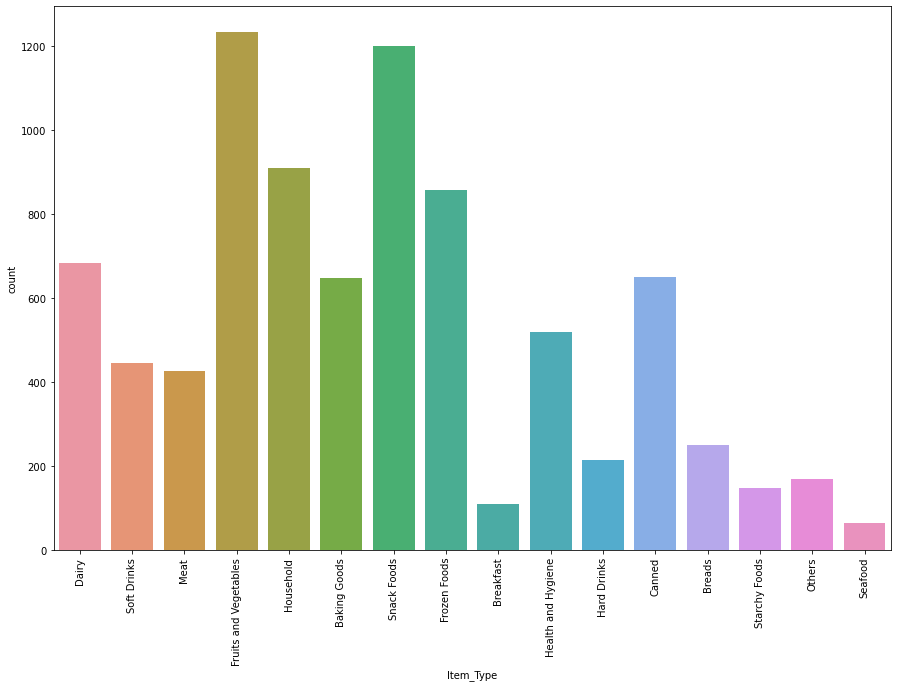

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(Train.Item_Type)
plt.xticks(rotation=90)
plt.show()

Here we observe that which item is sale more. According to above plot  Fruits and Vegetables have more sales.

In [17]:
Train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### Distrbution of the Outlet_size

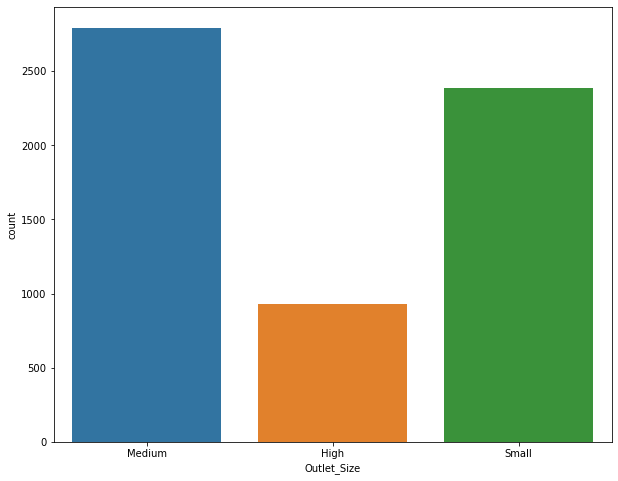

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(Train.Outlet_Size)
plt.show()

Here we observe that medium type outlets are more followed by small and high outlets.

In [19]:
Train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

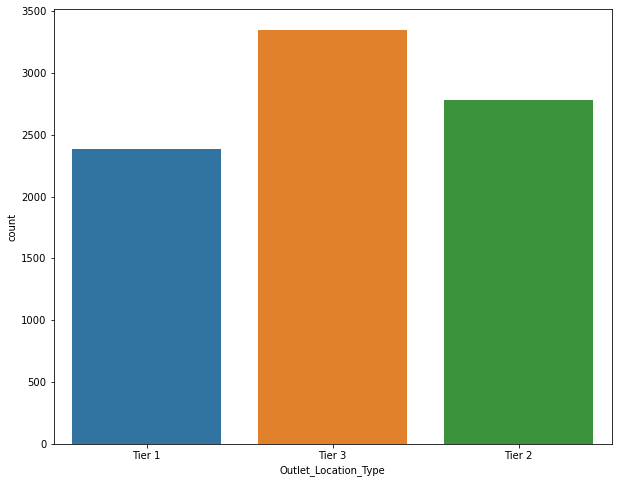

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(Train.Outlet_Location_Type)

Here we observe that most of the oulets located in Tier2 location followed by Tier2 and Tier1.

In [21]:
Train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

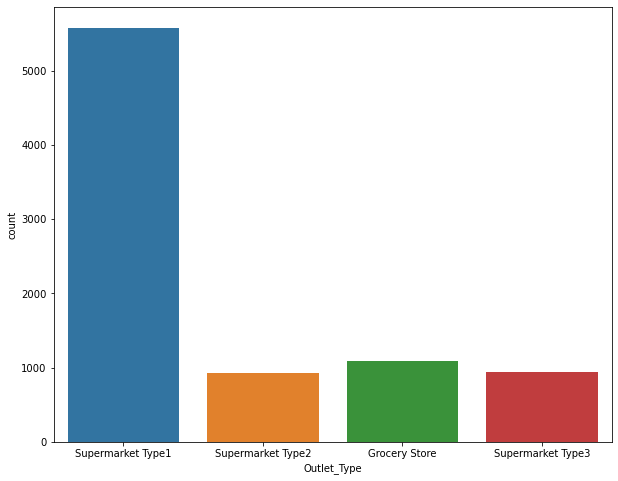

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(Train.Outlet_Type)

Here we observe that Supermarket type1 outlets are more

In [23]:
Train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

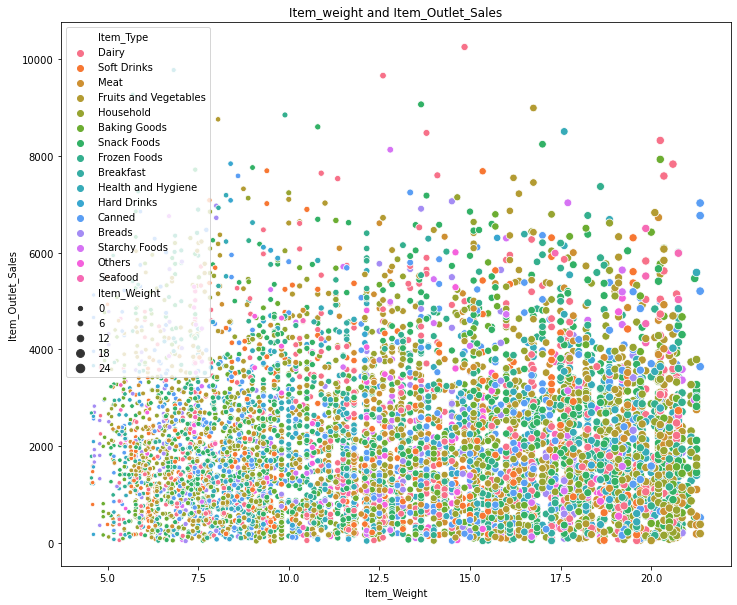

In [24]:
plt.figure(figsize=(12,10))
plt.xlabel('Item_weight')
plt.ylabel('Item_Outlet_Sales')
plt.title("Item_weight and Item_Outlet_Sales")
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",hue="Item_Type",size='Item_Weight',data=Train)

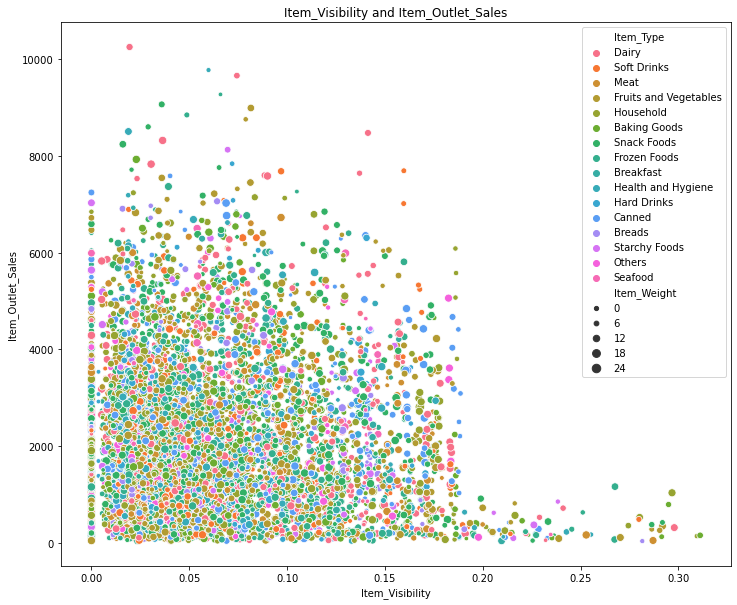

In [25]:
plt.figure(figsize=(12,10))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.title("Item_Visibility and Item_Outlet_Sales")
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",hue="Item_Type",size='Item_Weight',data=Train)

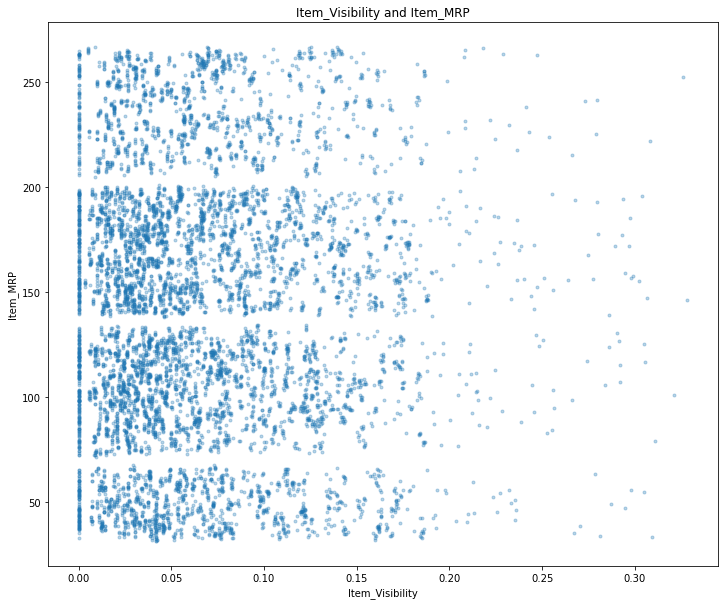

In [26]:
plt.figure(figsize=(12,10))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_MRP')
plt.title("Item_Visibility and Item_MRP")
plt.plot(Train.Item_Visibility,Train.Item_MRP,'.',data=Train,alpha=0.3)

In [27]:
df["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [28]:
#here we replace the values which have same category but different name.
df["Item_Fat_Content"]=df["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [29]:
df["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [30]:
Train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


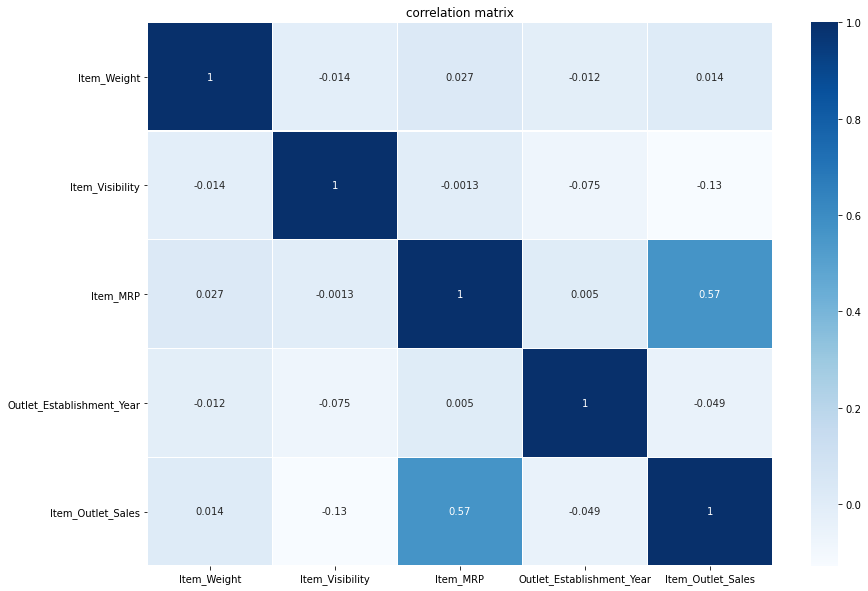

In [31]:
fig=plt.figure(figsize=(14,10))
hm=Train.corr(method='pearson')
sns.heatmap(hm,annot=True,cmap="Blues",linewidths=.1)
plt.title("correlation matrix")
plt.show()

Above plot we observe that Item_weight and Item_Outlet_Sales are less correlated.

## Feature Engineering and Transformation

### Treating the Missing Values

#### Item_Weight

From the boxplot we plotted at beginings, we notice that the Item_Weight has some null values and lets replace them with the Mean of the column

In [32]:
df["Item_Weight"].mean()

12.792854228644991

In [33]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

#### Outlet_Size

we will be replacing the NaN values in the ***Outlet_Size*** column with medium.

In [34]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [35]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [36]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

#### Item_Visibility

In [37]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [38]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

#### Outlet Years

In [39]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [40]:
df['Outlet_Years']=2009-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

#### Item_Type

In [41]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

The item types are either Food, Drinks or Non-Consumables

In [42]:
df['Item_Identifier'].value_counts()

FDS55    10
FDY02    10
FDG10    10
DRH03    10
FDW39    10
         ..
NCW54     7
FDM52     7
FDM50     7
FDM10     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: int64

A closer look at each of the Item_Identifier shows that they either starts with either FD-Food, DR-Drink and NC-Non-Consumable.
we will be creating 3 categories as pointed out instead of the already existing 16 categories

In [43]:
#changing only first 2 characters (i.e. the category ID)
df['New_Item_type']=df['Item_Identifier'].apply(lambda x: x[0:2])

In [44]:
#Rename them to more intuitive categories:
df['New_Item_type']=df['New_Item_type'].map({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
   
df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: New_Item_type, dtype: int64

In [45]:
#mark non_consumable as separate category in low fat:
df.loc[df["New_Item_type"]=='Non-Consumable','Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [46]:
item_visib_avg=df.pivot_table(values='Item_Visibility',index='Item_Identifier')
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.034938
DRA24,0.045646
DRA59,0.133384
DRB01,0.079736
DRB13,0.006799
...,...
NCZ30,0.027302
NCZ41,0.056396
NCZ42,0.011015


In [47]:
function=lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index==x['Item_Identifier']][0]
df['item_visib_avg']=df.apply(function,axis=1).astype(float)

In [48]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drink,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,0.000000


### Dealing with our Categorical values

### Label Encoder

In [49]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

df['Outlet']=label.fit_transform(df['Outlet_Identifier'])
varib=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet']
for i in varib:
    df[i]=label.fit_transform(df[i])

In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,11,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,22,2,0.000000,1


Now we create dummy variables for these label encoded varibales in order to avoid our algorithm ranking these labels


In [51]:
#Dummy varibales
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet'])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [52]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,10,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,10,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,11,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,22,...,0,1,0,0,0,0,0,0,0,0


## Model Building

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error 

In [54]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [55]:
train=df.loc[df["source"]=='train'].copy()
test1=df.loc[df["source"]=='test'].copy()

In [56]:
train.drop(['source'],axis=1,inplace=True)

In [57]:
test1.drop(['source'],axis=1,inplace=True)

In [58]:
test1.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [59]:
train.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

In [60]:
#Shape of train and test
print('There are {} rows and {} columns in train'.format(train.shape[0],train.shape[1]))
print('There are {} rows and {} columns in test'.format(test1.shape[0],test1.shape[1]))

There are 8523 rows and 31 columns in train
There are 5681 rows and 31 columns in test


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(train.values, Train['Item_Outlet_Sales'].values, test_size=0.20, random_state=7)

In [62]:
models=[LinearRegression(),
        Lasso(), Ridge(),
        ElasticNet(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor(),
      ]
model_names=['LinearRegression',
        'Lasso', 'Ridge',
        'ElasticNet',
        'SVR',
        'DecisionTreeRegressor',
        'KNeighborsRegressor',
        'RandomForestRegressor',
        'AdaBoostRegressor',
        'GradientBoostingRegressor']
r2=[]
mae=[]
mse=[]
rmse=[]
d={}

for model in range(len(models)):
    mod=models[model]
    mod.fit(X_train,Y_train)
    pred=mod.predict(X_test)
    r2.append(r2_score(Y_test,pred))
    mae.append(mean_absolute_error(Y_test,pred))
    mse.append(mean_squared_error(Y_test,pred))
    rmse.append(np.sqrt(mean_squared_error(Y_test,pred)))

    
d={'Modelling Algo':model_names,'R2_score':r2,
   'mean_absolute_error':mae,
   'mean_squared_error':mse,
   'root_mean_squared_error':rmse}
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,R2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
0,LinearRegression,0.545758,864.986419,1.405083e+06,1185.361909
1,Lasso,0.545711,864.351382,1.405228e+06,1185.423264
2,Ridge,0.545755,864.931587,1.405092e+06,1185.365743
3,ElasticNet,0.453735,926.322297,1.689733e+06,1299.897149
4,SVR,0.186772,1132.227069,2.515516e+06,1586.037883
5,DecisionTreeRegressor,0.217345,1068.516452,2.420947e+06,1555.939266
6,KNeighborsRegressor,0.482008,884.877253,1.602276e+06,1265.810593
7,RandomForestRegressor,0.544458,820.136560,1.409104e+06,1187.057014
8,AdaBoostRegressor,0.521617,919.643411,1.479756e+06,1216.452271
9,GradientBoostingRegressor,0.574731,787.818991,1.315461e+06,1146.935553


In [63]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([80,82,84,85,90,91,92,94,95,150,200]))

In [64]:
from sklearn.model_selection import GridSearchCV
num_folds = 10
RMS = 'neg_mean_squared_error'
model = GradientBoostingRegressor(random_state=42)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=RMS, cv=5)
grid_result = grid.fit(rescaledX, Y_train)

In [65]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1146978.510289 using {'n_estimators': 80}
-1146978.510289 (23871.064719) with: {'n_estimators': 80}
-1146995.643122 (23708.985286) with: {'n_estimators': 82}
-1147696.329756 (24186.809530) with: {'n_estimators': 84}
-1148108.738232 (24432.180819) with: {'n_estimators': 85}
-1148493.868325 (23389.128693) with: {'n_estimators': 90}
-1148712.016140 (23403.981010) with: {'n_estimators': 91}
-1149658.431057 (23576.323320) with: {'n_estimators': 92}
-1150118.317872 (23694.862086) with: {'n_estimators': 94}
-1150639.152009 (23350.156877) with: {'n_estimators': 95}
-1162264.776162 (20074.023701) with: {'n_estimators': 150}
-1173814.937369 (24043.218897) with: {'n_estimators': 200}


In [67]:
#Make predictions on validation dataset using best estimstor = 80
# prepare the model
from sklearn.metrics import mean_squared_error 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=80, random_state=30)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print("RMSE = ", mean_squared_error(Y_test, predictions))

RMSE =  1289357.5652108828


In [68]:
#Stanrdard scaling of the test dataset
rescaled_test1 = scaler.transform(test1)

In [69]:
#Predict on the test dataset
predicted_prices = model.predict(rescaled_test1)

#PRepare submission file
Test['Item_Outlet_Sales'] = predicted_prices
Test.to_csv('BigData_Mart_Sales_Problem.csv',index=False)
Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test,1668.600319
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,1346.172776
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test,677.766295
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test,2614.126114
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test,5677.678227
